In [ ]:
#Purpose: Plot splicing order for first and last block exon (Figure 5C and S4B)
#Input: table outputs from insplico tool (see methods part of manuscript), anootation exon file
#      used to run insplico, coordinates for first and last block exon (script 3)
# Date: 04/29/2025

In [22]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

sns.set(font_scale=1.5)
sns.set_style("white")

warnings. filterwarnings('ignore')

In [23]:
#Load data that were ouput from insplico: https://gitlab.com/aghr/insplico/-/wikis/home
C1 = pd.read_table("kd_1_insplico.tab",sep = "\t")
C2 = pd.read_table("kd_2_insplico.tab", sep = "\t")
C3 = pd.read_table("kd_3_insplico.tab", sep = "\t")

In [24]:
#Load in the exons file for annotation (same as used for insplico)
ann = pd.read_csv("exons_for_insplico.tab", sep = "\t")

Text(0, 0.5, 'Exon count')

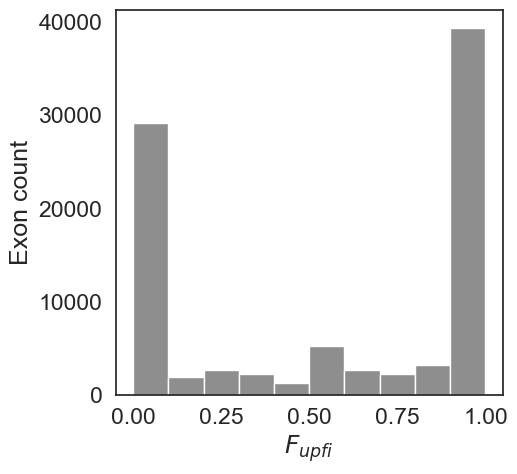

In [25]:
f, ax = plt.subplots(1,1, figsize = (5,5))

sns.histplot(C1, x = "FUPFI", bins = 10, color = "dimgrey")
ax.set_xlabel("$F_{upfi}$")
ax.set_ylabel("Exon count")

In [26]:
#Now subset block exons. Load the dataframes with coordinates for first and last block exon.
first = pd.read_csv('first_block_exon.moreSKIPPED.csv')
last = pd.read_csv('last_block_exon.moreSKIPPED.csv')

In [28]:
#generate a matching "Coord" column in exon-annotation file
ann["Coord"] = ann["CHR"].astype(str) + ":" + ann["STARTS"].astype(str) + "-" + ann["ENDS"].astype(str)


In [29]:
#Merge coordinates 
C1_v2 = C1.join(ann, how='outer')
C2_v2 = C2.join(ann, how='outer')
C3_v2 = C3.join(ann, how='outer')

In [30]:
C1_v2.to_csv("ctr_1_insplico_SRS_mRNA.csv", index =False)
C2_v2.to_csv("ctr_2_insplico_SRS_mRNA.csv", index =False)
C3_v2.to_csv("ctr_3_insplico_SRS_mRNA.csv", index =False)


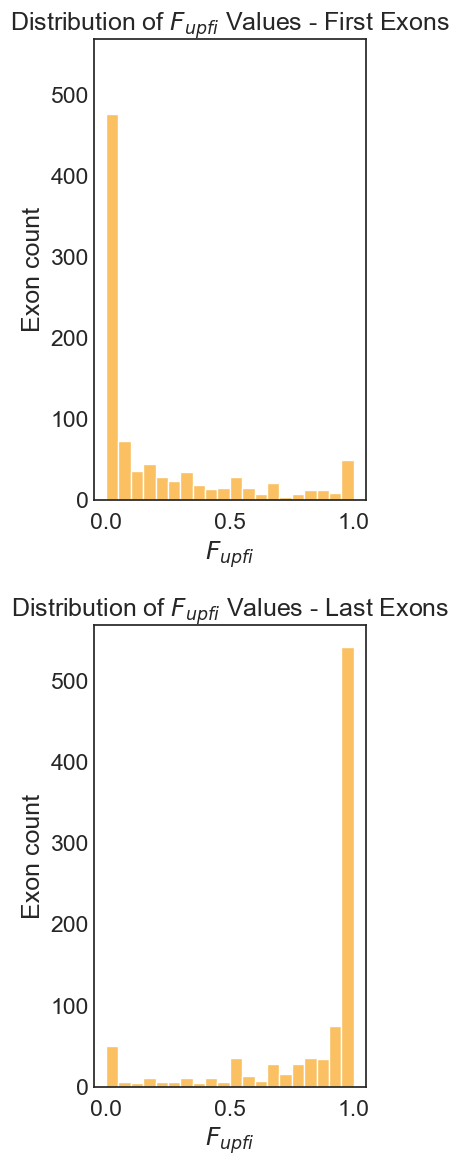

In [31]:
# Filter DataFrames to retain only entries where `Coord` is in all three
common_first_coords = set(C1_v2["Coord"]).intersection(C2_v2["Coord"], C3_v2["Coord"]).intersection(first["Coord"])
common_last_coords = set(C1_v2["Coord"]).intersection(C2_v2["Coord"], C3_v2["Coord"]).intersection(last["Coord"])

# Subsample DataFrames for first and last exons
f_C1_v2 = C1_v2[C1_v2["Coord"].isin(common_first_coords)]
f_C2_v2 = C2_v2[C2_v2["Coord"].isin(common_first_coords)]
f_C3_v2 = C3_v2[C3_v2["Coord"].isin(common_first_coords)]

l_C1_v2 = C1_v2[C1_v2["Coord"].isin(common_last_coords)]
l_C2_v2 = C2_v2[C2_v2["Coord"].isin(common_last_coords)]
l_C3_v2 = C3_v2[C3_v2["Coord"].isin(common_last_coords)]

# Combine the dataframes and calculate mean for each `Coord`
def calculate_mean(df1, df2, df3):
    combined = pd.concat([df1, df2, df3], axis=0)
    result = (
        combined.groupby("Coord")
        .agg(mean_FUPFI=("FUPFI", "mean"), count=("FUPFI", "count"))
        .reset_index()
    )
    return result

# Calculate for first and last
first_combined = calculate_mean(f_C1_v2, f_C2_v2, f_C3_v2)
last_combined = calculate_mean(l_C1_v2, l_C2_v2, l_C3_v2)

# Add type column
first_combined["Type"] = "#FFD449"
last_combined["Type"] = "last"


# Define the figure size and create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4, 12), sharey=True)

# Define the color
plot_color = "#F9A620"

# Find the max y-value for consistent y-ticks
max_count = max(
    first_combined["mean_FUPFI"].value_counts().max(), 
    last_combined["mean_FUPFI"].value_counts().max()
)

# Create tick positions (integer values up to max_count)
yticks = np.arange(0, max_count + 100, 100)  # Adjust step size if needed

# Plot histogram for 'first' DataFrame
sns.histplot(
    data=first_combined,
    x="mean_FUPFI",
    bins=20,
    color=plot_color,
    alpha=0.7,
    ax=axes[0]
)
axes[0].set_xlabel("$F_{upfi}$")
axes[0].set_ylabel("Exon count")
axes[0].set_title("Distribution of $F_{upfi}$ Values - First Exons")
axes[0].set_yticks(yticks)  # Explicitly set y-axis ticks
axes[0].tick_params(axis="y", which="both", direction="in", length=6, width=1)  # Force tick marks

# Plot histogram for 'last' DataFrame
sns.histplot(
    data=last_combined,
    x="mean_FUPFI",
    bins=20,
    color=plot_color,
    alpha=0.7,
    ax=axes[1]
)
axes[1].set_xlabel("$F_{upfi}$")
axes[1].set_ylabel("Exon count")
axes[1].set_title("Distribution of $F_{upfi}$ Values - Last Exons")
axes[1].set_yticks(yticks)  # Explicitly set y-axis ticks
axes[1].tick_params(axis="y", which="both", direction="in", length=6, width=1)  # Force tick marks

# Adjust layout for better readability
plt.tight_layout()

# Save the plots
plt.savefig('ctr_SRS_nRNA_eif4a3_smash_exon_count_FUPFI_comparison.png')
plt.savefig('ctr_SRS_nRNA_eif4a3_smash_exon_count_FUPFI_comparison.pdf')

# Show the plots
plt.show()


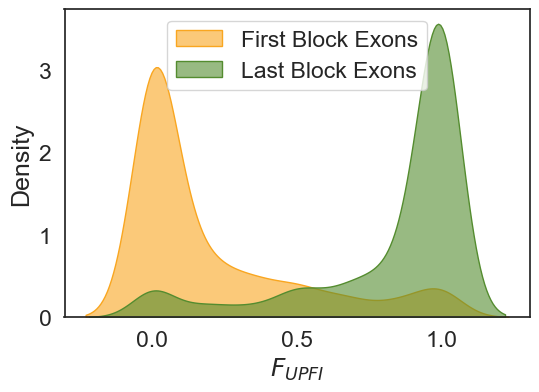

In [32]:
#Density Plot
plt.figure(figsize=(6, 4))
sns.kdeplot(first_combined["mean_FUPFI"], fill=True, color="#F9A620", alpha=0.6, label="First Block Exons")
sns.kdeplot(last_combined["mean_FUPFI"], fill=True, color="#548C2F", alpha=0.6, label="Last Block Exons")
plt.xlabel("$F_{UPFI}$")
plt.ylabel("Density")
plt.savefig("FUPFI_block_exons_control_nRNA_eif4a3_smash_SRS.pdf")
plt.legend()
plt.show()

